In [144]:
from zipfile import ZipFile
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [55]:
dataset='data.zip'
with ZipFile(dataset,'r') as zip:
    zip.extractall()
    print('The dataset is extracted')

The dataset is extracted


In [56]:
with_mask_files=os.listdir('data/with_mask')
print(with_mask_files[:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [57]:
without_mask_files=os.listdir('data/without_mask')
print(without_mask_files[:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [58]:
print('Number of with mask images: ',len(with_mask_files))
print('Number of without mask images: ',len(without_mask_files))

Number of with mask images:  3725
Number of without mask images:  3828


In [59]:
with_mask_labels=[1]*len(with_mask_files)
without_mask_labels=[0]*len(without_mask_files)

In [60]:
print(with_mask_labels[:5])
print(without_mask_labels[:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [61]:
print('Length of with mask labels is: ',len(with_mask_labels))
print('Length of without mask labels is: ',len(without_mask_labels))

Length of with mask labels is:  3725
Length of without mask labels is:  3828


In [62]:
labels=with_mask_labels+without_mask_labels
print('Length of all labels is: ',len(labels))
print(labels[:5])
print(labels[-5:])

Length of all labels is:  7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


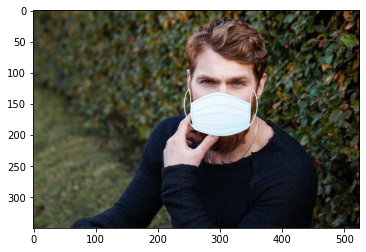

In [63]:
img=mpimg.imread('data/with_mask/with_mask_1.jpg')
imgplot=plt.imshow(img)
plt.show()

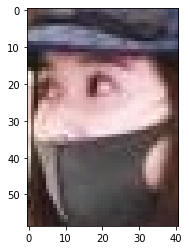

In [64]:
img=mpimg.imread('data/with_mask/with_mask_203.jpg')
imgplot=plt.imshow(img)
plt.show()

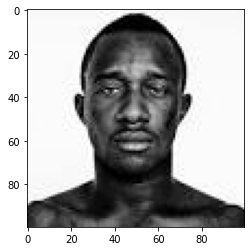

In [65]:
img=mpimg.imread('data/without_mask/without_mask_1.jpg')
imgplot=plt.imshow(img)
plt.show()

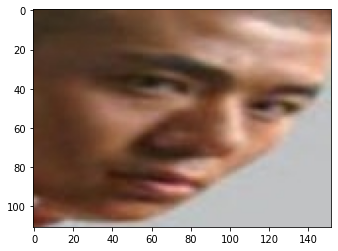

In [66]:
img=mpimg.imread('data/without_mask/without_mask_203.jpg')
imgplot=plt.imshow(img)
plt.show()

In [67]:
with_mask_path='data/with_mask/'
data=[]
for img_file in with_mask_files:
    img=with_mask_path+img_file
    image=Image.open(img)
    image=image.resize((80,80))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [68]:
without_mask_path='data/without_mask/'
for img_file in without_mask_files:
    img=without_mask_path+img_file
    image=Image.open(img)
    image=image.resize((80,80))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

In [69]:
type(data)

list

In [70]:
len(data)

7553

In [71]:
data[0]

array([[[ 47,  56,  32],
        [ 57,  60,  41],
        [ 63,  61,  35],
        ...,
        [ 70,  61,  35],
        [ 29,  34,  24],
        [ 33,  40,  21]],

       [[ 50,  58,  36],
        [ 57,  62,  35],
        [ 56,  51,  22],
        ...,
        [ 84,  55,  20],
        [ 38,  38,  24],
        [ 22,  30,  21]],

       [[ 49,  57,  37],
        [ 51,  54,  33],
        [ 42,  40,  14],
        ...,
        [102,  68,  32],
        [ 49,  46,  26],
        [ 11,  11,   4]],

       ...,

       [[ 80,  87,  51],
        [ 75,  88,  47],
        [ 69,  84,  47],
        ...,
        [  9,   8,   5],
        [ 17,  16,  10],
        [ 39,  42,  34]],

       [[ 63,  73,  38],
        [ 70,  80,  47],
        [ 65,  76,  47],
        ...,
        [  8,  10,   7],
        [ 10,   9,   6],
        [ 21,  20,  15]],

       [[ 55,  68,  34],
        [ 59,  66,  43],
        [ 51,  57,  34],
        ...,
        [ 21,  20,  11],
        [ 17,  16,  14],
        [ 16,  11,  10]]

In [72]:
type(data[0])

numpy.ndarray

In [73]:
data[0].shape

(80, 80, 3)

In [74]:
X=np.array(data)
y=np.array(labels)

In [75]:
type(X)

numpy.ndarray

In [76]:
type(y)

numpy.ndarray

In [77]:
print(X.shape)
print(y.shape)

(7553, 80, 80, 3)
(7553,)


In [78]:
print(X[0])

[[[ 47  56  32]
  [ 57  60  41]
  [ 63  61  35]
  ...
  [ 70  61  35]
  [ 29  34  24]
  [ 33  40  21]]

 [[ 50  58  36]
  [ 57  62  35]
  [ 56  51  22]
  ...
  [ 84  55  20]
  [ 38  38  24]
  [ 22  30  21]]

 [[ 49  57  37]
  [ 51  54  33]
  [ 42  40  14]
  ...
  [102  68  32]
  [ 49  46  26]
  [ 11  11   4]]

 ...

 [[ 80  87  51]
  [ 75  88  47]
  [ 69  84  47]
  ...
  [  9   8   5]
  [ 17  16  10]
  [ 39  42  34]]

 [[ 63  73  38]
  [ 70  80  47]
  [ 65  76  47]
  ...
  [  8  10   7]
  [ 10   9   6]
  [ 21  20  15]]

 [[ 55  68  34]
  [ 59  66  43]
  [ 51  57  34]
  ...
  [ 21  20  11]
  [ 17  16  14]
  [ 16  11  10]]]


In [79]:
print(y)

[1 1 1 ... 0 0 0]


In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2,stratify=y,shuffle=True)

In [81]:
print(X_train.shape)

(6042, 80, 80, 3)


In [82]:
print(X_test.shape)

(1511, 80, 80, 3)


In [83]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [84]:
X_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[167, 119, 102],
        [171, 121,  99],
        [110,  78,  68],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[168, 125, 107],
        [172, 125, 103],
        [123,  92,  80],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[170, 127, 108],
        [169, 127, 105],
        [137, 104,  88],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [85]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.65490196, 0.46666667, 0.4       ],
        [0.67058824, 0.4745098 , 0.38823529],
        [0.43137255, 0

In [91]:
model=Sequential()

In [92]:
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(80,80,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [93]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [94]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 80, 80, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 40, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 40, 40, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │       3,276,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,641 (12.61 MB)

 Trainable params: 3,304,641 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [95]:
history=model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 29s 162ms/step - accuracy: 0.6937 - loss: 0.5902 - val_accuracy: 0.9074 - val_loss: 0.2431
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 27s 159ms/step - accuracy: 0.8837 - loss: 0.2900 - val_accuracy: 0.9124 - val_loss: 0.2074
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 27s 157ms/step - accuracy: 0.8994 - loss: 0.2525 - val_accuracy: 0.9074 - val_loss: 0.1964
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 26s 153ms/step - accuracy: 0.9308 - loss: 0.1789 - val_accuracy: 0.9058 - val_loss: 0.2464
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 26s 154ms/step - accuracy: 0.9349 - loss: 0.1719 - val_accuracy: 0.9107 - val_loss: 0.1957


In [97]:
loss,accuracy=model.evaluate(X_test_scaled,y_test)
print('Test Accuracy is: ',accuracy)
print('Test Loss is: ',loss)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9175 - loss: 0.2275
Test Accuracy is:  0.9172733426094055
Test Loss is:  0.20674671232700348


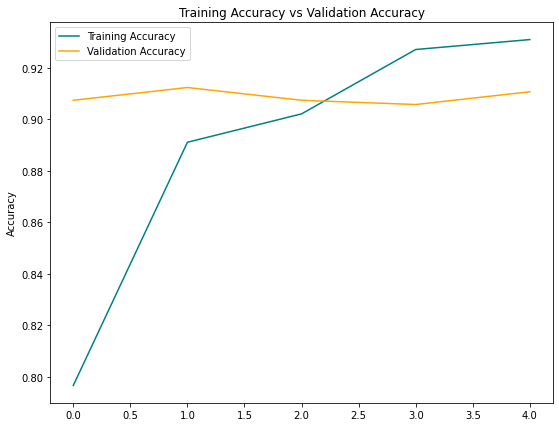

In [106]:
plt.figure(figsize=(9,7))
plt.plot(history.history['accuracy'],color='teal',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],color='orange',label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

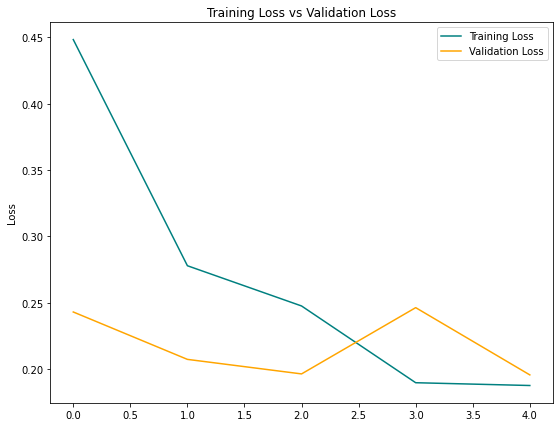

In [107]:
plt.figure(figsize=(9,7))
plt.plot(history.history['loss'],color='teal',label='Training Loss')
plt.plot(history.history['val_loss'],color='orange',label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.legend()
plt.show()

Path of the image to be predicted: data/with_mask/with_mask_800.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction: The person in the image is wearing a mask


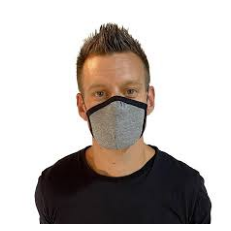

In [126]:
input_image_path=input('Path of the image to be predicted: ')
input_image=cv2.imread(input_image_path)
input_image_resized=cv2.resize(input_image,(80,80))
input_image_resized=np.array(input_image_resized)
input_image_resized=input_image_resized/255
input_image_reshape=np.reshape(input_image_resized,[1,80,80,3])
y_predict=model.predict(input_image_reshape)
y_pred=np.where(y_predict>0.5,1,0)
if y_pred==1:
    print('Prediction: The person in the image is wearing a mask')
else:
    print('Prediction: The person in the image is not wearing a mask')
plt.imshow(cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()